In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment 

In [2]:
N = 100
tetha = 50
np.random.seed(42)
X = np.random.randint(tetha, 2 * tetha, N)
tetha_estimate = 2 / 3 * (np.sum(X) / N)

In [3]:
a = 0.05

left0 = np.max(X) / (1 + (1 - a / 2) ** (1 / N))
right0 = np.max(X) / (1 + (a / 2) ** (1 / N))
print("Точный интервал: ", "[", left0, ',', right0, ']')
print("Размах = ", right0 - left0)

Точный интервал:  [ 49.506266157442646 , 50.41289414632564 ]
Размах =  0.9066279888829953


In [4]:
XX = X ** 2
left1 = -1.96 * (2 / 3) / 10 * np.sqrt(0.01 * np.sum(XX) - (0.01 * np.sum(X)) ** 2) + tetha_estimate
right1 = 1.96 * (2 / 3) / 10 * np.sqrt(0.01 * np.sum(XX) - (0.01 * np.sum(X)) ** 2) + tetha_estimate
print("Асимптотический интервал: [", left1, ', ', right1, ']')
print("Размах = ", right1 - left1)

Асимптотический интервал: [ 47.50164632822605 ,  51.25835367177394 ]
Размах =  3.7567073435478875


In [5]:
M = np.array([])
for i in range(1000):
    M = np.append(M, 2 / 3 * np.mean(np.random.choice(X, size = len(X))) - 2 / 3 * np.mean(X))

M = np.sort(M)

left2 = 2 / 3 * np.mean(X) + M[24]
right2 = 2 / 3 * np.mean(X) + M[974]

print("Бутстраповский интервал: [", left2, ', ', right2, ']')
print("Размах = ", right2 - left2)

Бутстраповский интервал: [ 47.56 ,  51.25333333333333 ]
Размах =  3.693333333333328


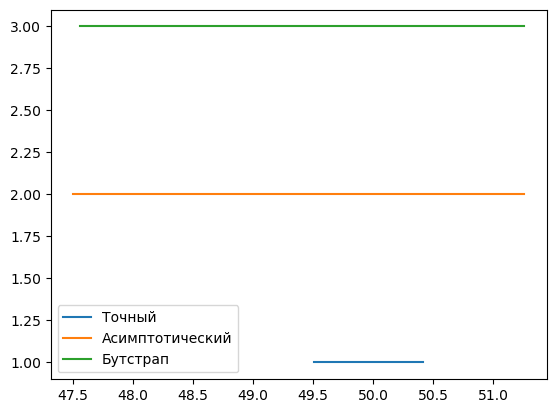

In [6]:
x1 = np.linspace(left0, right0, 100)
y1 = [1] * 100

x2 = np.linspace(left1, right1, 100)
y2 = [2] * 100

x3 = np.linspace(left2, right2, 100)
y3 = [3] * 100

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)

plt.legend(["Точный", "Асимптотический", "Бутстрап"])

plt.show()